# Statistical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets
import matplotlib.colors as colors

In [2]:
sv = pd.read_csv('../results/indices/mun_svi_index.csv', encoding='latin1')
ds = pd.read_csv('../results/indices/mun_ds_index.csv')

In [3]:
sv = sv.sort_values('mun_name').reset_index(drop=True)
sv

,mun_name,% CREDIT,Credit Score,% worked 1 hour,Paid Activity Score,% Can Read,Literacy Score,% HH Animals,HH Animals Score,% Fishing,...,Internet Score,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Rank sum weights)
0,Alto Zambeze,0.013699,0.956621,0.898876,0.033708,0.397059,0.681398,0.777778,0.226804,0.055556,...,0.875610,0.465903,0.577834,0.728971,0.036268,0.235435,0.134467,0.516845,0.465903,0.371637
1,Ambaca,0.139423,0.558493,0.675325,0.274026,0.703488,0.301922,0.087302,0.931517,0.047619,...,0.944715,0.438932,0.610561,0.672541,0.114611,0.028294,0.082859,0.681188,0.438932,0.365009
2,Amboim (Gabela),0.169312,0.463844,0.204545,0.780114,0.535714,0.509690,0.653846,0.353291,0.192308,...,1.000000,0.471734,0.643561,0.794180,0.120845,0.048576,0.126043,0.501605,0.471734,0.372468
3,Ambriz,0.041096,0.869863,0.142857,0.846429,0.352941,0.736032,0.562500,0.446521,0.250000,...,1.000000,0.467146,0.509747,0.474574,0.100469,0.150779,0.205110,0.510340,0.467146,0.325170
4,Ambuíla,NaN,NaN,NaN,NaN,0.500000,0.553918,0.611111,0.396907,0.166667,...,1.000000,0.454418,0.585237,0.833333,0.026888,0.176310,0.056360,0.534637,0.454418,0.368794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Ukuma,0.020000,0.936667,0.762712,0.180085,0.541935,0.501986,0.777778,0.226804,0.000000,...,NaN,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524
157,Uíge,0.201166,0.362973,0.267416,0.712528,0.643781,0.375862,0.195804,0.820777,0.013986,...,1.000000,0.447501,0.545092,0.734251,0.118506,0.050183,0.090273,0.573863,0.447501,0.352028
158,Viana,0.100890,0.680514,0.272051,0.707545,0.800000,0.182404,0.652381,0.354786,0.009524,...,1.000000,0.429535,0.590206,0.630630,0.109631,0.151451,0.097273,0.476272,0.429535,0.342577
159,Virei,0.208955,0.338307,0.301205,0.676205,0.747126,0.247882,0.414286,0.597791,0.171429,...,1.000000,0.474709,0.795336,0.781058,0.083356,0.048430,0.146838,0.546702,0.474709,0.400287


## Checking Data

Reference of looking at the distribution and relationship of each socioeconomic indicator to the drought severity index

In [109]:
sv.columns

Index(['mun_name', '% CREDIT ', 'Credit Score', '% worked 1 hour',
       'Paid Activity Score', '% Can Read', 'Literacy Score', '% HH Animals',
       'HH Animals Score', '% Fishing', 'Fishing Score',
       'Mean Distance to roads (meter)', 'Road Score', 'Children Under 5',
       'Children Score', 'Pop Over 60', 'Elderly Score', 'Pop Density',
       'POP Score', 'Child Dependency Ratio', 'Dependency Score',
       'Infant Mortality', 'Mortality Score', 'Malaria Count', 'Malaria Score',
       '% Forest', 'Forest Score', '% Surface Water', 'Water Score',
       '% Cropland', 'Cropland Score', '%_HIV_Positive', 'HIV Score',
       '% drinking_surface_water', 'Drnking Score', '% Flush_toilet_facility',
       'Toilet Score', '% electricity access', 'Unnamed: 38',
       '% internet_access', 'Internet Score', 'SVI_Final', 'Physical',
       'Social', 'Demographic', 'Health', 'Economic', 'Agricultural',
       'SVI (Equal Weight)', 'SVI (Rank sum weights)'],
      dtype='object')

There are 20 socioeconomic indicators.

In [17]:
range(1,39,20)

range(1, 39, 20)

In [110]:
sv.iloc[:,1]

0      0.013699
1      0.139423
2      0.169312
3      0.041096
4           NaN
         ...   
156    0.020000
157    0.201166
158    0.100890
159    0.208955
160    0.076087
Name: % CREDIT , Length: 161, dtype: float64

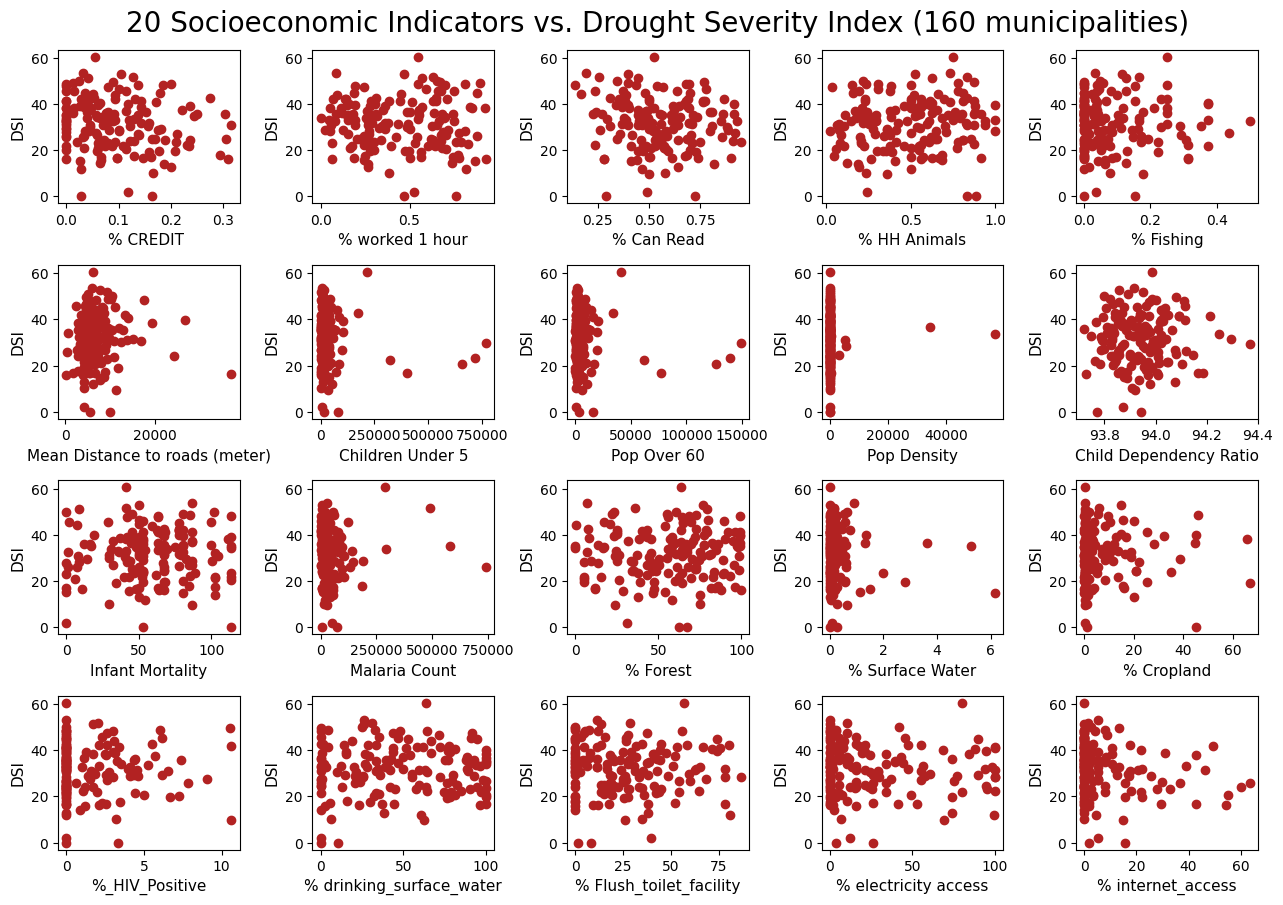

In [111]:
plt.figure(figsize=(15,10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i,column_num in enumerate(range(1,40,2)):
    plt.subplot(4,5,i+1)
    plt.plot(sv.iloc[:,column_num], ds['Final Drought Severity Index'], 'o', color='firebrick')
    plt.xlabel(sv.columns[column_num], fontsize=11)
    plt.ylabel('DSI', fontsize=11)
plt.suptitle('20 Socioeconomic Indicators vs. Drought Severity Index (160 municipalities)', fontsize=20, y=0.94)
plt.savefig('../results/figures/svi_vs_dsi.png', dpi=300, bbox_inches='tight')

C:\Users\esl26\AppData\Local\Temp\ipykernel_64488\1157138115.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='black')


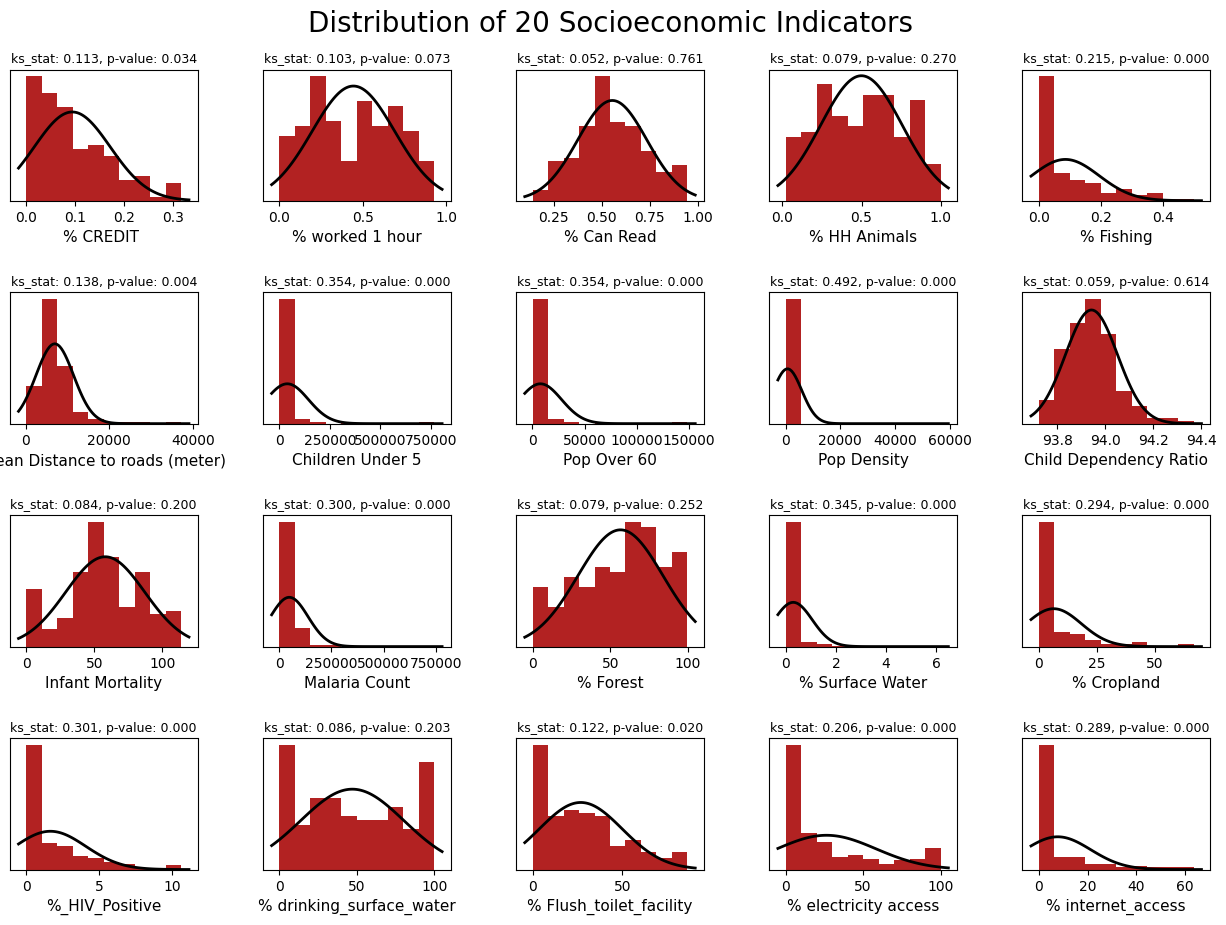

In [114]:
plt.figure(figsize=(15,10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.7)

for i,column_num in enumerate(range(1,40,2)):
    plt.subplot(4,5,i+1)
    data = sv.iloc[:, column_num] # Extract the data
    data = data[np.isfinite(data)] # Remove NaNs
    plt.hist(data, bins=10, density=True, color='firebrick') # Plot the histogram
    mu, std = stats.norm.fit(data) # Fit a normal distribution to the data
    
    # Plot the PDF of the fitted normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, color='black')

    # Perform Kolmogorov-Smirnov test
    ks_stat, p_value = stats.kstest(data, 'norm', args=(mu, std))
    
    # Display the p-value
    plt.title(f"ks_stat: {ks_stat:.3f}, p-value: {p_value:.3f}", fontsize=9, y=0.99)
    
    plt.xlabel(sv.columns[column_num], fontsize=11)
    plt.yticks([])

plt.suptitle('Distribution of 20 Socioeconomic Indicators', fontsize=20, y=0.96)
plt.savefig('../results/figures/dist_se_indicators.png', dpi=300, bbox_inches='tight')

Checking that there is a heavy skewness towards the left for some distributions.

(array([83., 23., 20.,  6.,  6.,  3.,  7.,  2.,  1.,  1.]),
 array([0.        , 0.09153897, 0.18307795, 0.27461692, 0.36615589,
        0.45769487, 0.54923384, 0.64077281, 0.73231178, 0.82385076,
        0.91538973]),
 <BarContainer object of 10 artists>)

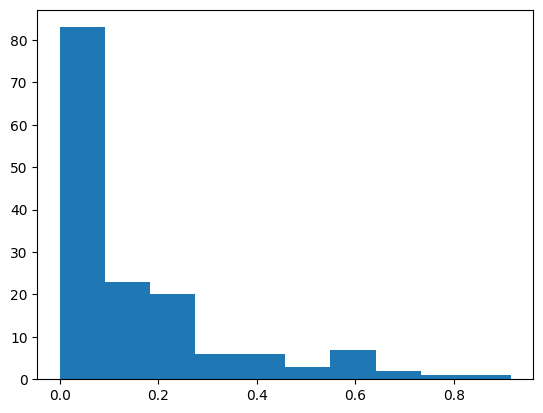

In [92]:
data = sv['% Surface Water'][sv['% Surface Water']<1]
data = data[np.isfinite(data)]
plt.hist(data)

## Kendall Tau-b Test

In [142]:
for i,column_num in enumerate(range(1,40,2)):
    # Remove NaN values and get the ranks
    ranked_pop_density = sv.iloc[:, column_num].dropna().rank()
    ranked_dsi = ds['Final Drought Severity Index'].dropna().rank()

    # Find the common indices
    common_indices = ranked_pop_density.index.intersection(ranked_dsi.index)

    # Filter the ranks to have only common indices
    filtered_pop_density = ranked_pop_density.loc[common_indices]
    filtered_dsi = ranked_dsi.loc[common_indices]

    # Perform Kendall Tau test
    tau, p_value = stats.kendalltau(filtered_pop_density, filtered_dsi)

    print(f"{sv.columns[column_num]}: {tau}, {p_value}")

% CREDIT : -0.12579121722304643, 0.020500929828936202
% worked 1 hour: -0.03931351977019271, 0.47093645255535876
% Can Read: -0.08852744337369993, 0.1001921468389692
% HH Animals: 0.08169341391712868, 0.1329221697209906
% Fishing: -0.03430513777269854, 0.5434943407262729
Mean Distance to roads (meter): 0.08408711524640665, 0.11339035122266172
Children Under 5: -0.050079583872513656, 0.3457498360920037
Pop Over 60: -0.050390154935288936, 0.3427668715137465
Pop Density: 7.764276569381961e-05, 0.9988336475184629
Child Dependency Ratio: 0.017314336749721777, 0.7444373184955647
Infant Mortality: 0.013659667837265977, 0.7990655216480502
Malaria Count: -0.07927326377338982, 0.13556693506189893
% Forest: 0.03222174776293514, 0.544083390899067
% Surface Water: -0.03121360354064756, 0.5567693435564517
% Cropland: 0.04914787068418782, 0.35479762617621646
%_HIV_Positive: -0.010561357585717315, 0.8600394910624789
% drinking_surface_water: -0.01184688379311685, 0.8303938845295845
% Flush_toilet_faci

## Spearman

In [239]:
p_values = []
for i,column_num in enumerate(range(1,40,2)):
    # Remove NaN values and get the ranks
    ranked_pop_density = sv.iloc[:, column_num].dropna().rank()
    ranked_dsi = ds['Final Drought Severity Index'].dropna().rank()

    # Find the common indices
    common_indices = ranked_pop_density.index.intersection(ranked_dsi.index)

    # Filter the ranks to have only common indices
    filtered_pop_density = ranked_pop_density.loc[common_indices]
    filtered_dsi = ranked_dsi.loc[common_indices]

    # Perform Kendall Tau test
    tau, p_value = stats.spearmanr(filtered_pop_density, filtered_dsi)
    p_values.append(p_value)

    print(f"{sv.columns[column_num]}: {tau}, {p_value}")
p_values = np.array(p_values)
print(p_values[p_values<0.05])

% CREDIT : -0.1884337925429143, 0.018107450394316913
% worked 1 hour: -0.05469090299951803, 0.5019376395339517
% Can Read: -0.129005498435655, 0.10734259481168112
% HH Animals: 0.11808877360860326, 0.14335297351562
% Fishing: -0.0525728802858968, 0.5158999501189232
Mean Distance to roads (meter): 0.12237902747517791, 0.12197530629889347
Children Under 5: -0.08020192101014338, 0.31184934822678845
Pop Over 60: -0.08001501036277832, 0.3129820177041367
Pop Density: 0.0007030715889347839, 0.9929376423639853
Child Dependency Ratio: 0.029898514707359568, 0.7065468324095714
Infant Mortality: 0.015620147942926614, 0.8440895991973758
Malaria Count: -0.11843089949314331, 0.13458026275332619
% Forest: 0.050519072434358894, 0.524498122729039
% Surface Water: -0.04716765465788857, 0.5524064855594225
% Cropland: 0.0695925851108596, 0.3803700776203347
%_HIV_Positive: -0.013944830858709662, 0.8650563318596518
% drinking_surface_water: -0.014083898627884972, 0.8637235439336812
% Flush_toilet_facility: -

## Pearson

In [143]:
for i, column_num in enumerate(range(1, 40, 2)):
    # Remove NaN values from each dataset and align them
    filtered_pop_density = sv.iloc[:, column_num].dropna()
    filtered_dsi = ds['Final Drought Severity Index'].dropna()

    # Find the common indices
    common_indices = filtered_pop_density.index.intersection(filtered_dsi.index)

    # Filter the data to include only common indices
    aligned_pop_density = filtered_pop_density.loc[common_indices]
    aligned_dsi = filtered_dsi.loc[common_indices]

    # Perform Pearson correlation test
    pearson_corr, p_value_pearson = stats.pearsonr(aligned_pop_density, aligned_dsi)

    # Output the results
    print(f"{sv.columns[column_num]}: {pearson_corr}, {p_value_pearson}")

% CREDIT : -0.18394542782418533, 0.02110361724064078
% worked 1 hour: -0.04742569336708911, 0.5604721458973168
% Can Read: -0.12081297957169271, 0.1317563865179501
% HH Animals: 0.10017441505480348, 0.2149057732319623
% Fishing: -0.015981535016982733, 0.8435375821255535
Mean Distance to roads (meter): 0.043394192542607235, 0.5846687763188633
Children Under 5: -0.09503544866173055, 0.23045602692796344
Pop Over 60: -0.09499172594620565, 0.23067155106150763
Pop Density: 0.026695523834116625, 0.7367586400826879
Child Dependency Ratio: 0.03317294537572504, 0.6761278815940465
Infant Mortality: 0.014980925768783893, 0.8503937177259755
Malaria Count: 0.051875710466592694, 0.5134079578492119
% Forest: 0.033122771985251015, 0.6765902081812379
% Surface Water: -0.0881298876466416, 0.2662695936857977
% Cropland: -0.0065285276209256235, 0.9344931258140121
%_HIV_Positive: -0.005440752474961948, 0.9471373894213377
% drinking_surface_water: 0.02063921032635176, 0.8013980903388165
% Flush_toilet_facili

Sample Correlation Heatmap

<Axes: >

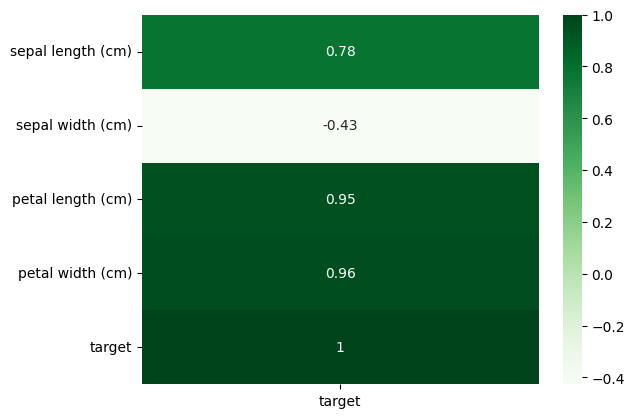

In [169]:
dataset = datasets. load_iris()
dataframe = pd.DataFrame(data=dataset. data, columns=dataset. feature_names)
dataframe["target"] = dataset.target
matrix = dataframe.corr()
filtered_matrix = pd.DataFrame(matrix.iloc[:,-1])

# plotting correlation matrix
sns.heatmap(filtered_matrix, cmap="Greens", annot=True)


In [179]:
df

,% CREDIT,% worked 1 hour,% Can Read,% HH Animals,% Fishing,Mean Distance to roads (meter),Children Under 5,Pop Over 60,Pop Density,Child Dependency Ratio,...,Malaria Count,% Forest,% Surface Water,% Cropland,%_HIV_Positive,% drinking_surface_water,% Flush_toilet_facility,% electricity access,% internet_access,Drought Severity Index
0,0.013699,0.898876,0.397059,0.777778,0.055556,9602.226810,9614.622875,1866.895888,7.790997,93.820275,...,46158.917980,55.421263,0.520595,5.697684,6.048387,4.333184,7.407407,3.508772,7.894737,48.979933
1,0.139423,0.675325,0.703488,0.087302,0.047619,4742.717948,3506.707282,677.960421,3.567495,94.076348,...,1851.598505,50.312142,0.047907,0.208704,0.000000,79.644269,54.468717,75.000000,3.508772,26.794872
2,0.169312,0.204545,0.535714,0.653846,0.192308,7256.174141,12212.261010,2364.553176,0.767643,94.081276,...,34005.830510,72.807914,0.011339,3.157773,0.000000,59.194890,13.230994,21.052632,0.000000,25.071429
3,0.041096,0.142857,0.352941,0.562500,0.250000,13419.828800,1861.162154,359.137316,24.046234,94.034531,...,1771.200876,63.785873,0.211466,0.567580,2.631579,33.260870,80.264530,55.263158,0.000000,42.062500
4,NaN,NaN,0.500000,0.611111,0.166667,6424.193217,11679.607560,2267.927986,22.603979,93.787205,...,14328.681920,74.919078,0.324132,0.155945,4.081633,20.155367,0.000000,0.000000,0.000000,32.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.020000,0.762712,0.541935,0.777778,0.000000,6156.557563,6615.645606,1285.358769,92.845327,94.008286,...,14871.004310,89.706210,1.977784,0.284117,NaN,NaN,NaN,NaN,NaN,23.562500
157,0.201166,0.267416,0.643781,0.195804,0.013986,4216.404317,9706.020393,1885.709800,5.306666,94.078079,...,44283.313190,37.995348,0.023740,20.031180,0.000000,38.235294,38.095238,73.684211,0.000000,12.894737
158,0.100890,0.272051,0.800000,0.652381,0.009524,3257.332558,38047.883720,7382.389609,66.446809,94.001801,...,146387.277000,5.254945,0.249583,22.181926,3.030303,55.231725,78.441152,100.000000,0.000000,28.333333
159,0.208955,0.301205,0.747126,0.414286,0.171429,10842.865350,28213.607060,5405.089719,58.890895,93.936348,...,14411.517050,55.991684,0.055564,5.016967,0.000000,100.000000,34.892897,15.037594,0.000000,23.558974


In [190]:
df = pd.DataFrame()
for i, column_num in enumerate(range(1, 40, 2)):
    df[f'{sv.columns[column_num]}'] = sv.iloc[:, column_num]
df['Drought Severity Index'] = ds['Final Drought Severity Index']

Edit the names. Remove the percent signs.

In [194]:
sv.columns

Index(['mun_name', '% CREDIT ', 'Credit Score', '% worked 1 hour',
       'Paid Activity Score', '% Can Read', 'Literacy Score', '% HH Animals',
       'HH Animals Score', '% Fishing', 'Fishing Score',
       'Mean Distance to roads (meter)', 'Road Score', 'Children Under 5',
       'Children Score', 'Pop Over 60', 'Elderly Score', 'Pop Density',
       'POP Score', 'Child Dependency Ratio', 'Dependency Score',
       'Infant Mortality', 'Mortality Score', 'Malaria Count', 'Malaria Score',
       '% Forest', 'Forest Score', '% Surface Water', 'Water Score',
       '% Cropland', 'Cropland Score', '%_HIV_Positive', 'HIV Score',
       '% drinking_surface_water', 'Drnking Score', '% Flush_toilet_facility',
       'Toilet Score', '% electricity access', 'Unnamed: 38',
       '% internet_access', 'Internet Score', 'SVI_Final', 'Physical',
       'Social', 'Demographic', 'Health', 'Economic', 'Agricultural',
       'SVI (Equal Weight)', 'SVI (Rank sum weights)'],
      dtype='object')

In [193]:
df.columns

Index(['% CREDIT ', '% worked 1 hour', '% Can Read', '% HH Animals',
       '% Fishing', 'Mean Distance to roads (meter)', 'Children Under 5',
       'Pop Over 60', 'Pop Density', 'Child Dependency Ratio',
       'Infant Mortality', 'Malaria Count', '% Forest', '% Surface Water',
       '% Cropland', '%_HIV_Positive', '% drinking_surface_water',
       '% Flush_toilet_facility', '% electricity access', '% internet_access',
       'Drought Severity Index'],
      dtype='object')

In [195]:
df.columns = ['Credit', 'Paid Activity', 'Literacy', 'HH Animals', 'Fishing', 'Mean Dist. to Roads', 'Children under 5', 'Elderly (> 60 y/o)', 'Population Density', 
              'Child Dependency Ratio', 'Infant Mortality', 'Malaria Count', 'Forest Cover', 'Surface Water', 'Cropland', 'HIV Count', 'Drinking Surface Water', 'Sanitation Facility',
              'Electricity Access', 'Internet Access', 'Drought Severity Index']

In [234]:
four_colors = [
    "darkred",
    "red",
    "orange",
    "yellow"
]
cmap2 = colors.ListedColormap(four_colors)

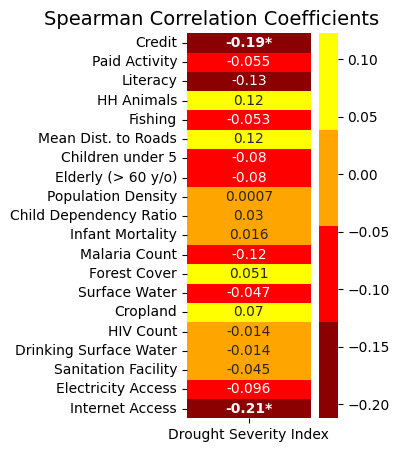

In [254]:
fig, ax = plt.subplots(figsize=(2, 5))
matrix = df.corr(method="spearman")
filtered_matrix = pd.DataFrame(matrix.iloc[:-1, -1])
hm = sns.heatmap(filtered_matrix, cmap=cmap2, annot=True, ax=ax)
hm.texts[0].set_text(f"{hm.texts[0].get_text()}*")
hm.texts[0].set_fontweight('bold')
hm.texts[-1].set_text(f"{hm.texts[-1].get_text()}*")
hm.texts[-1].set_fontweight('bold')
plt.title("Spearman Correlation Coefficients", fontsize=14, x=0.2)
plt.savefig('../results/figures/spearman_corr_heatmap.png', dpi=300, bbox_inches='tight')

In [244]:
hm.texts[-1]

Text(0.5, 19.5, '-0.21')

Looking at individual socioeconomic indicators

In [4]:
import geopandas as gpd
from shapely import wkt
ds['geometry'] = ds['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(ds, crs='epsg:4326')
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,3
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1


Text(0.5, 1.0, 'Road Score')

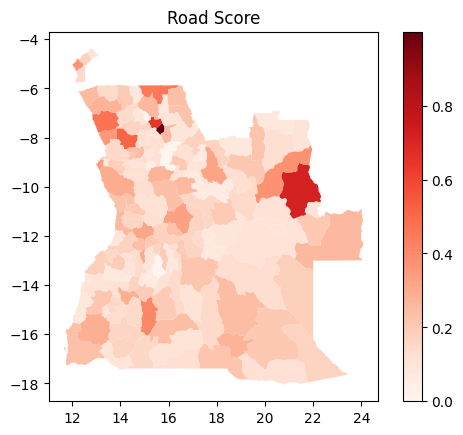

In [10]:
gdf['Road Score'] = sv['Road Score']
gdf.plot(column='Road Score', cmap='Reds', legend=True)
plt.title('Road Score')

Text(0.5, 1.0, 'Percentage of Cropland')

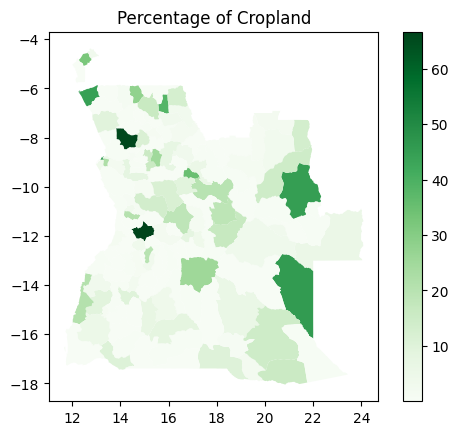

In [12]:
gdf['Cropland'] = sv['% Cropland']
gdf.plot(column='Cropland', cmap='Greens', legend=True)
plt.title('Percentage of Cropland')